In [1]:
import json
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import chain
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Read data

In [64]:
# Load the pickled list
with open("/Utilisateurs/umushtaq/emotion_analysis_comics/incontext_learning/results/icl_llama-3-8b-Instruct-bnb-4bit/results_10.pickle", 'rb') as f:
    
    results = pickle.load(f)

In [65]:
# # Load the pickled list
# with open("/Utilisateurs/umushtaq/emotion_analysis_comics/finetuning/saved_models/comics_Llama-3.2-1B-Instruct-bnb-4bit/comics_results_2.pickle", 'rb') as f:
    
#     results = pickle.load(f)

In [66]:
all_labels = ["anger", "surprise", "fear", "disgust", "sadness", "joy", "neutral"]

In [67]:
grounds = results['ground_truths']
predictions = results['predictions']

In [68]:
len(grounds), len(predictions)

(1776, 1776)

In [69]:
grounds

[['surprise', 'joy'],
 ['joy'],
 ['surprise', 'joy'],
 ['joy'],
 ['joy'],
 ['joy'],
 ['surprise'],
 ['joy'],
 ['joy'],
 ['neutral'],
 ['neutral'],
 ['neutral'],
 ['neutral'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['neutral'],
 ['sadness'],
 ['sadness'],
 ['anger', 'sadness'],
 ['anger', 'sadness'],
 ['anger', 'sadness'],
 ['fear', 'surprise'],
 ['surprise'],
 ['joy'],
 ['anger', 'surprise'],
 ['joy'],
 ['joy'],
 ['joy'],
 ['anger'],
 ['anger'],
 ['surprise', 'joy'],
 ['fear', 'sadness'],
 ['fear', 'sadness'],
 ['fear', 'surprise'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['fear', 'sadness'],
 ['fear', 'sadness', 'surprise'],
 ['sadness'],
 ['sadness'],
 ['fear', 'sadness'],
 ['sadness', 'surprise'],
 ['sadness', 'surprise'],
 ['joy'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger', 'disgust'],
 ['joy'],
 ['joy'],
 ['surprise', 'joy'],
 ['surprise', 'joy'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['neutral'],
 ['joy'],
 ['joy'],
 ['neutral'

In [70]:
predictions

[['neutral', 'joy'],
 ['joy'],
 ['neutral', 'surprise'],
 ['neutral'],
 ['neutral', 'joy'],
 ['joy'],
 ['surprise', 'fear'],
 ['joy'],
 ['joy'],
 ['neutral'],
 ['surprise'],
 ['joy', 'surprise'],
 ['neutral'],
 ['anger'],
 ['anger', 'surprise'],
 ['neutral'],
 ['surprise', 'fear', 'joy'],
 ['sadness', 'anger'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['anger', 'sadness'],
 ['surprise', 'fear', 'anger'],
 ['surprise', 'anger'],
 ['neutral'],
 ['anger', 'surprise'],
 ['sadness', 'surprise'],
 ['joy'],
 ['joy'],
 ['anger', 'disgust'],
 ['anger', 'sadness'],
 ['anger', 'surprise', 'joy'],
 ['surprise', 'sadness'],
 ['joy'],
 ['neutral', 'surprise'],
 ['anger', 'disgust', 'fear'],
 ['surprise'],
 ['anger', 'disgust'],
 ['sadness'],
 ['surprise', 'sadness', 'neutral'],
 ['surprise', 'joy'],
 ['anger', 'disgust'],
 ['anger', 'surprise'],
 ['surprise', 'fear'],
 ['anger'],
 ['joy'],
 ['anger', 'surprise'],
 ['sadness', 'disgust', 'neutral'],
 ['anger', 'disgust'],
 ['anger', 'sadness'],

In [71]:
#grounds = [json.loads(x)["list_emotion_classes"] for x in grounds]

In [72]:
#predictions = [json.loads(x)["utterance_emotions"] for x in predictions]

In [73]:
#predictions = [x['list_emotion_classes'] for x in predictions]

In [74]:
len(grounds), len(predictions)

(1776, 1776)

In [75]:
from sklearn.preprocessing import MultiLabelBinarizer

In [76]:
mlb = MultiLabelBinarizer()

In [77]:
y_true_mhot = mlb.fit_transform(grounds)

In [78]:
y_true_mhot.shape

(1776, 7)

In [79]:
y_pred_mhot = mlb.transform(predictions)

/Utilisateurs/umushtaq/.conda/envs/er_nb_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['concern', 'curiosity', 'gratitude', 'hope', 'pain', 'pleading'] will be ignored
  warnings.warn(


In [80]:
y_pred_mhot.shape

(1776, 7)

In [81]:
print(classification_report(y_true_mhot, y_pred_mhot, digits=3))

              precision    recall  f1-score   support

           0      0.613     0.555     0.583       614
           1      0.183     0.412     0.254        85
           2      0.418     0.445     0.431       407
           3      0.508     0.681     0.582       429
           4      0.166     0.326     0.220       129
           5      0.385     0.372     0.378       347
           6      0.413     0.780     0.540       486

   micro avg      0.429     0.560     0.486      2497
   macro avg      0.384     0.510     0.427      2497
weighted avg      0.455     0.560     0.491      2497
 samples avg      0.444     0.564     0.473      2497



In [21]:
print(classification_report(y_true_mhot, y_pred_mhot, target_names=all_labels, digits=3)) ## wrong order.

              precision    recall  f1-score   support

       anger      0.613     0.555     0.583       614
    surprise      0.183     0.412     0.254        85
        fear      0.418     0.445     0.431       407
     disgust      0.508     0.681     0.582       429
     sadness      0.166     0.326     0.220       129
         joy      0.385     0.372     0.378       347
     neutral      0.413     0.780     0.540       486

   micro avg      0.429     0.560     0.486      2497
   macro avg      0.384     0.510     0.427      2497
weighted avg      0.455     0.560     0.491      2497
 samples avg      0.444     0.564     0.473      2497



In [527]:
predictions

[['neutral', 'joy'],
 ['joy'],
 ['neutral', 'surprise'],
 ['neutral'],
 ['neutral', 'joy'],
 ['joy'],
 ['surprise', 'fear'],
 ['joy'],
 ['joy'],
 ['neutral'],
 ['surprise'],
 ['joy', 'surprise'],
 ['neutral'],
 ['anger'],
 ['anger', 'surprise'],
 ['neutral'],
 ['surprise', 'fear', 'joy'],
 ['sadness', 'anger'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['anger', 'sadness'],
 ['surprise', 'fear', 'anger'],
 ['surprise', 'anger'],
 ['neutral'],
 ['anger', 'surprise'],
 ['sadness', 'surprise'],
 ['joy'],
 ['joy'],
 ['anger', 'disgust'],
 ['anger', 'sadness'],
 ['anger', 'surprise', 'joy'],
 ['surprise', 'sadness'],
 ['joy'],
 ['neutral', 'surprise'],
 ['anger', 'disgust', 'fear'],
 ['surprise'],
 ['anger', 'disgust'],
 ['sadness'],
 ['surprise', 'sadness', 'neutral'],
 ['surprise', 'joy'],
 ['anger', 'disgust'],
 ['anger', 'surprise'],
 ['surprise', 'fear'],
 ['anger'],
 ['joy'],
 ['anger', 'surprise'],
 ['sadness', 'disgust', 'neutral'],
 ['anger', 'disgust'],
 ['anger', 'sadness'],

In [528]:
grounds_l = [len(element) for element in grounds]
predictions_l = [len(element) for element in predictions]

In [529]:
counts_grounds = Counter(grounds_l)
counts_predictions = Counter(predictions_l)

In [530]:
counts_grounds

Counter({1: 1119, 2: 594, 3: 62, 4: 1})

In [531]:
counts_predictions

Counter({2: 1176, 1: 443, 3: 151, 4: 6})

In [532]:
#single_pred_idxs = [idx for idx,elem in enumerate(grounds) if len(elem) == 1]

In [533]:
#len(single_pred_idxs)

In [534]:
#grounds = [elem for idx, elem in enumerate(grounds) if idx in single_pred_idxs]
#predictions = [elem for elem in predictions if len(elem) == 1]

In [535]:
#len(grounds), len(predictions)

In [536]:
grounds

[['surprise', 'joy'],
 ['joy'],
 ['surprise', 'joy'],
 ['joy'],
 ['joy'],
 ['joy'],
 ['surprise'],
 ['joy'],
 ['joy'],
 ['neutral'],
 ['neutral'],
 ['neutral'],
 ['neutral'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['neutral'],
 ['sadness'],
 ['sadness'],
 ['anger', 'sadness'],
 ['anger', 'sadness'],
 ['anger', 'sadness'],
 ['fear', 'surprise'],
 ['surprise'],
 ['joy'],
 ['anger', 'surprise'],
 ['joy'],
 ['joy'],
 ['joy'],
 ['anger'],
 ['anger'],
 ['surprise', 'joy'],
 ['fear', 'sadness'],
 ['fear', 'sadness'],
 ['fear', 'surprise'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['fear', 'sadness'],
 ['fear', 'sadness', 'surprise'],
 ['sadness'],
 ['sadness'],
 ['fear', 'sadness'],
 ['sadness', 'surprise'],
 ['sadness', 'surprise'],
 ['joy'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger', 'disgust'],
 ['joy'],
 ['joy'],
 ['surprise', 'joy'],
 ['surprise', 'joy'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['neutral'],
 ['joy'],
 ['joy'],
 ['neutral'

In [537]:
grounds

[['surprise', 'joy'],
 ['joy'],
 ['surprise', 'joy'],
 ['joy'],
 ['joy'],
 ['joy'],
 ['surprise'],
 ['joy'],
 ['joy'],
 ['neutral'],
 ['neutral'],
 ['neutral'],
 ['neutral'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['neutral'],
 ['sadness'],
 ['sadness'],
 ['anger', 'sadness'],
 ['anger', 'sadness'],
 ['anger', 'sadness'],
 ['fear', 'surprise'],
 ['surprise'],
 ['joy'],
 ['anger', 'surprise'],
 ['joy'],
 ['joy'],
 ['joy'],
 ['anger'],
 ['anger'],
 ['surprise', 'joy'],
 ['fear', 'sadness'],
 ['fear', 'sadness'],
 ['fear', 'surprise'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['anger', 'disgust'],
 ['fear', 'sadness'],
 ['fear', 'sadness', 'surprise'],
 ['sadness'],
 ['sadness'],
 ['fear', 'sadness'],
 ['sadness', 'surprise'],
 ['sadness', 'surprise'],
 ['joy'],
 ['anger'],
 ['anger'],
 ['anger'],
 ['anger', 'disgust'],
 ['joy'],
 ['joy'],
 ['surprise', 'joy'],
 ['surprise', 'joy'],
 ['anger', 'surprise'],
 ['anger', 'surprise'],
 ['neutral'],
 ['joy'],
 ['joy'],
 ['neutral'

In [538]:
# def flatten_list(mixed_list):
#     flattened = []
#     for item in mixed_list:
#         if isinstance(item, list):
#             flattened.extend(flatten_list(item))  # Recursively flatten sublists
#         else:
#             flattened.append(item)
#     return flattened

In [539]:
# grounds = flatten_list(grounds)

In [550]:
def labels_to_binary_matrix(label_list, all_labels):
    binary_matrix = np.zeros((len(label_list), len(all_labels)))
    
    for i, labels in enumerate(label_list):
        for label in labels:
            if label in all_labels:
                binary_matrix[i][all_labels.index(label)] = 1
                
    return binary_matrix

def opposite(component_type):
    
    return "none"

    # if component_type == "anger":
    #     return "surprise"
    # elif component_type == "disgust":
    #     return "joy"
    # elif component_type == "fear":
    #     return "sadness"
    # elif component_type == "sadness":
    #     return "anger"
    # elif component_type == "surprise":
    #     return "disgust"
    # elif component_type == "joy":
    #     return "fear"
    # elif component_type == "neutral":
    #     return "sadness"
    

def harmonize_preds(grounds, preds):

    l1, l2 = len(preds), len(grounds)
    if l1 < l2:
        diff = l2 - l1
        preds = preds + [opposite(x) for x in grounds[l1:]]
    else:
        preds = preds[:l2]
        
    return preds 

def post_process_icl(grounds, preds):

    for i,(x,y) in enumerate(zip(grounds, preds)):
        
        if len(x) != len(y):
            
            preds[i] = harmonize_preds(x, y)

    true_matrix = labels_to_binary_matrix(grounds, all_labels)
    predicted_matrix = labels_to_binary_matrix(preds, all_labels)

    return true_matrix, predicted_matrix

In [551]:
true_matrix, predicted_matrix = post_process_icl(grounds, predictions)

In [562]:
true_matrix = [item for sublist in true_matrix for item in sublist]
predicted_matrix = [item for sublist in predicted_matrix for item in sublist]

In [563]:
len(true_matrix), len(predicted_matrix)

(14208, 14208)

In [564]:
true_matrix

[np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float6

In [565]:
predicted_matrix

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float6

In [566]:
# def flatten_list(mixed_list):
#     flattened = []
#     for item in mixed_list:
#         if isinstance(item, list):
#             flattened.extend(flatten_list(item))  # Recursively flatten sublists
#         else:
#             flattened.append(item)
#     return flattened

In [567]:
#true_matrix = flatten_list(true_matrix)

In [568]:
# true_matrix = [str(elem) for elem in true_matrix]
# predicted_matrix = [str(elem) for elem in predicted_matrix]

## Classification Report

In [570]:
print(classification_report(true_matrix, predicted_matrix, labels=all_labels, target_names=all_labels, digits=3))

              precision    recall  f1-score   support

         0.0      0.891     0.893     0.892     11711
         1.0      0.493     0.490     0.492      2497

    accuracy                          0.822     14208
   macro avg      0.692     0.691     0.692     14208
weighted avg      0.821     0.822     0.822     14208



### Confusion Matrix

In [502]:
def get_confusion_matrices(grounds, predictions, all_labels):
    # Create a dictionary to map allowed labels to indices
    label_to_index = {label: idx for idx, label in enumerate(all_labels)}
    
    # Initialize one-hot encoded arrays for ground truths and predictions
    y_true = np.zeros((len(grounds), len(all_labels)), dtype=int)
    y_pred = np.zeros((len(predictions), len(all_labels)), dtype=int)
    
    # One-hot encode the ground truths (use only allowed labels)
    for i, labels in enumerate(grounds):
        for label in labels:
            if label in label_to_index:
                y_true[i][label_to_index[label]] = 1
    
    # One-hot encode the predictions, setting any unallowed label as false (0)
    for i, labels in enumerate(predictions):
        for label in labels:
            if label in label_to_index:
                y_pred[i][label_to_index[label]] = 1
    
    # Generate confusion matrices for each label in the desired structure
    confusion_matrices = {}
    for label, idx in label_to_index.items():
        # Get the confusion matrix from sklearn
        cm = confusion_matrix(y_true[:, idx], y_pred[:, idx])
        
        # Rearrange the confusion matrix to the requested structure: TP FP, FN TN
        tp = cm[1, 1]  # True Positive
        fp = cm[0, 1]  # False Positive
        fn = cm[1, 0]  # False Negative
        tn = cm[0, 0]  # True Negative
        
        # Create a matrix with the desired structure
        rearranged_cm = np.array([[tp, fp], [fn, tn]])
        confusion_matrices[label] = rearranged_cm
    
    return confusion_matrices

In [503]:
confusion_matrices = get_confusion_matrices(grounds, predictions, all_labels)

In [504]:
for label, cm in confusion_matrices.items():
    print(f"Confusion Matrix for label '{label}':\n{cm}\n")

Confusion Matrix for label 'anger':
[[313 165]
 [301 997]]

Confusion Matrix for label 'surprise':
[[346 296]
 [140 994]]

Confusion Matrix for label 'fear':
[[ 154  145]
 [ 253 1224]]

Confusion Matrix for label 'disgust':
[[  31   62]
 [  54 1629]]

Confusion Matrix for label 'sadness':
[[ 109  109]
 [ 238 1320]]

Confusion Matrix for label 'joy':
[[ 239  171]
 [ 190 1176]]

Confusion Matrix for label 'neutral':
[[  32  145]
 [  97 1502]]



### Plots

In [505]:
def plot_confusion_matrices(confusion_matrices, all_labels):
    # Set up a grid for plotting confusion matrices
    num_labels = len(all_labels)
    fig, axes = plt.subplots(1, num_labels, figsize=(4 * num_labels, 4))
    
    if num_labels == 1:
        axes = [axes]  # Ensure axes is always iterable
    
    # Plot each confusion matrix
    for i, (label, cm) in enumerate(confusion_matrices.items()):
        # Create a heatmap for the confusion matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
        
        # Set titles and labels
        axes[i].set_title(f'Confusion Matrix: {label}', fontsize=12)
        axes[i].set_xlabel('Predicted', fontsize=10)
        axes[i].set_ylabel('Actual', fontsize=10)
        
        # Customize x and y ticks
        axes[i].set_xticklabels(['Positive', 'Negative'])
        axes[i].set_yticklabels(['Positive', 'Negative'], rotation=0)
    
    plt.tight_layout()
    plt.show()

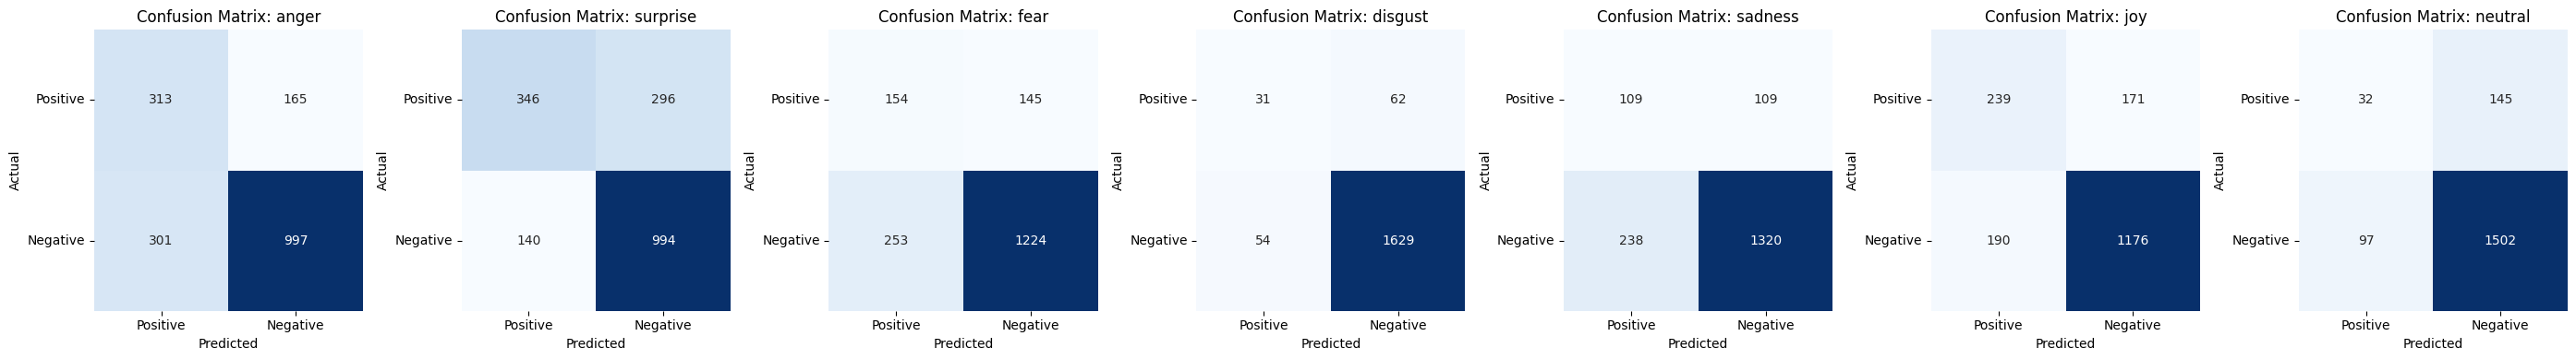

In [506]:
plot_confusion_matrices(confusion_matrices, all_labels)

In [507]:
def get_flattened_labels(grounds, predictions, all_labels):
    """
    Convert multi-label data into flat arrays of class indices.
    """
    y_true_flat = []
    y_pred_flat = []
    
    # Create a mapping from labels to indices
    label_to_index = {label: idx for idx, label in enumerate(all_labels)}
    
    # Flatten y_true and y_pred into class indices
    for true_labels, pred_labels in zip(grounds, predictions):
        true_one_hot = [0] * len(all_labels)
        pred_one_hot = [0] * len(all_labels)
        
        for label in true_labels:
            if label in label_to_index:
                true_one_hot[label_to_index[label]] = 1
        
        for label in pred_labels:
            if label in label_to_index:
                pred_one_hot[label_to_index[label]] = 1
        
        # Append the indices for the predicted and true labels
        y_true_flat.append(true_one_hot)
        y_pred_flat.append(pred_one_hot)
    
    return np.array(y_true_flat), np.array(y_pred_flat)

def plot_multi_class_confusion_matrix(y_true, y_pred, all_labels):
    """
    Plot a multi-class confusion matrix using the true and predicted labels.
    """
    # Flatten the multi-label arrays into single-label arrays
    y_true_flat = np.argmax(y_true, axis=1)
    y_pred_flat = np.argmax(y_pred, axis=1)

    # Compute the confusion matrix for multi-class classification
    cm = confusion_matrix(y_true_flat, y_pred_flat)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=all_labels, yticklabels=all_labels)
    
    # Set labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Multi-Class Confusion Matrix')
    plt.show()


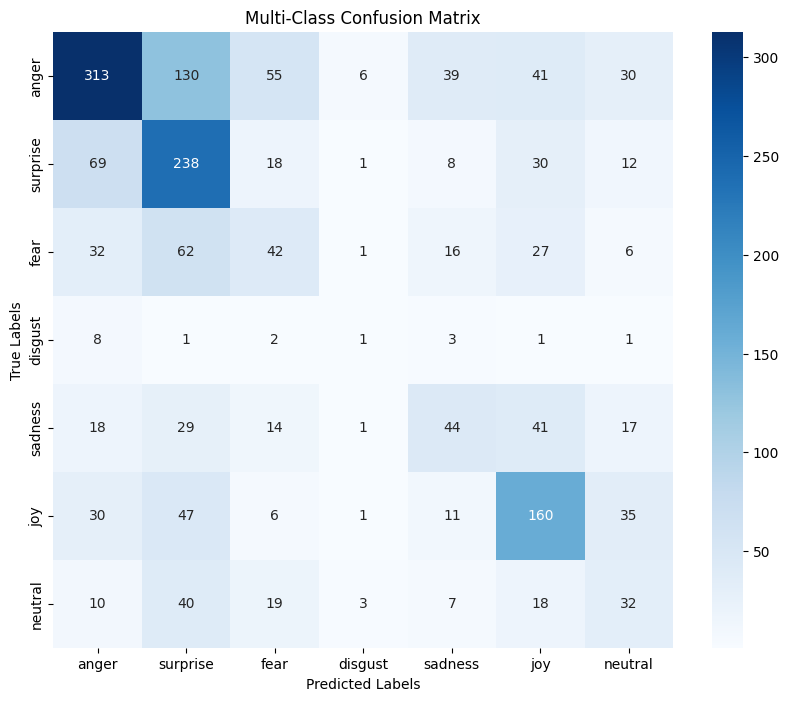

In [508]:
# Convert multi-label ground truth and predictions into flat labels
y_true, y_pred = get_flattened_labels(grounds, predictions, all_labels)

# Plot the multi-class confusion matrix
plot_multi_class_confusion_matrix(y_true, y_pred, all_labels)


In [509]:
from collections import Counter

def count_labels(grounds, all_labels):
    # Flatten the list of lists into a single list of labels
    all_true_labels = list(chain.from_iterable(grounds))
    
    # Use Counter to count occurrences of each label
    label_counts = Counter(all_true_labels)
    
    # Display counts for all labels in all_labels
    counts_display = {label: label_counts.get(label, 0) for label in all_labels}
    
    return counts_display



In [510]:
label_counts = count_labels(grounds, all_labels)

# Print the counts
for label, count in label_counts.items():
    print(f"Label '{label}': {count}")

Label 'anger': 614
Label 'surprise': 486
Label 'fear': 407
Label 'disgust': 85
Label 'sadness': 347
Label 'joy': 429
Label 'neutral': 129


In [513]:
from collections import Counter
from itertools import chain

def count_labels(predictions, all_labels):
    # Flatten the list of lists into a single list of labels
    all_predicted_labels = list(chain.from_iterable(predictions))
    
    # Use Counter to count occurrences of each label
    label_counts = Counter(all_predicted_labels)
    
    # Display counts for all labels in all_labels, ignoring any extra labels
    counts_display = {label: label_counts.get(label, 0) for label in all_labels}
    
    return counts_display

# Example usage
all_labels = ["anger", "surprise", "fear", "disgust", "sadness", "joy", "neutral", "none"]
#predictions = [['joy', 'happiness'], ['fear'], ['sadness', 'disgust'], ['neutral', 'fear', 'excitement']]

In [514]:
label_counts = count_labels(predictions, all_labels)

# Print the counts
for label, count in label_counts.items():
    print(f"Label '{label}': {count}")

Label 'anger': 478
Label 'surprise': 642
Label 'fear': 299
Label 'disgust': 93
Label 'sadness': 218
Label 'joy': 410
Label 'neutral': 177
Label 'none': 173
